In [13]:
import sqlite3
import pandas as pd
import matplotlib as rc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

# set style for seaborn
sns.set_style("whitegrid")
sns.set_context("paper")

WIDTH = 5.8
SMALL_HEIGHT = 3
MEDIUM_HEIGHT = 5
BIGGER_HEIGHT = 7

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

OUTPUT = "../output/graph/"

In [14]:
# connect to database
connection = sqlite3.connect("../output/db/bulk_analysis_2019-11-08_1000ms.db")


In [15]:
# load games and moves into dataframes 
df_game_dirty = pd.read_sql("SELECT * FROM game", connection)
df_move_dirty = pd.read_sql("SELECT * FROM move", connection)

# remove games that are either too short or too long
df_game = remove_outlier(df_game_dirty, "length")
#df_move = df_move_dirty[df_move_dirty["game_id"].isin(df_game["id"])]
df_move = df_move_dirty.query("ply_number <= 133")
df_move.head()


,id,fullmove_number,ply_number,turn,san,lan,score,score_change,score_change_category,move_count,...,guarded_pieces_centipawn_all,attacked_guarded_pieces_centipawn_all,unopposed_threats_centipawn_all,threats_centipawn_all,attack_defense_relation1,attack_defense_relation2,material,pawn_ending,rook_ending,game_id
0,1,1,1,1,d4,d2-d4,-10,10,0.20,20,...,5800,0,0,0,0,-600,0,0,0,1
1,2,1,2,0,g6,g7-g6,118,128,2.56,20,...,5800,0,0,0,0,-500,0,0,0,1
2,3,2,3,1,c4,c2-c4,37,81,1.62,28,...,5700,0,0,0,0,-1500,0,0,0,1
3,4,2,4,0,Bg7,Bf8-g7,106,69,1.38,21,...,5900,100,0,0,600,-2100,0,0,0,1
4,5,3,5,1,Nf3,Ng1-f3,43,63,1.26,30,...,5900,100,0,0,900,-1300,0,0,0,1


In [16]:
# connect to database
connection = sqlite3.connect("../output/db/repeated_bulk_analysis_2019-08-28.db")


In [25]:
# load games and moves into dataframes 
df_score = pd.read_sql("SELECT MAX(score_b0010) - MIN(score_b0010) as '10\,ms', MAX(score_b0020) - MIN(score_b0020) as '20\,ms', MAX(score_b0050) - MIN(score_b0050) as '50\,ms', MAX(score_b0100) - MIN(score_b0100) as '100\,ms', MAX(score_b0200) - MIN(score_b0200) as '200\,ms', MAX(score_b0500) - MIN(score_b0500) as '500\,ms', MAX(score_b1000) - MIN(score_b1000) as '1000\,ms', MAX(score_b2000) - MIN(score_b2000) as '2000\,ms', MAX(score_b10) - MIN(score_b10) as '17\,d', MAX(score_b20) - MIN(score_b20) as '20\,d' FROM score JOIN move ON score.move_id = move.id GROUP BY move.game_id, move.ply_number", connection)
df_score.describe().to_csv("real_time_score_evaluation.csv")


In [26]:
df_score.describe()

,"10\,ms","20\,ms","50\,ms","100\,ms","200\,ms","500\,ms","1000\,ms","2000\,ms","17\,d","20\,d"
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,34.003215,32.588424,31.572347,32.372990,30.906752,27.147910,25.099678,23.546624,28.919614,24.601286
std,23.366574,20.509739,22.465610,23.516688,19.588533,19.435186,17.010614,17.201564,19.152107,16.003080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,20.000000,19.000000,19.000000,19.500000,16.000000,14.000000,14.000000,18.000000,15.000000
50%,30.000000,30.000000,30.000000,29.000000,29.000000,24.000000,23.000000,22.000000,26.000000,23.000000
75%,45.500000,42.000000,41.000000,42.000000,41.000000,34.000000,33.000000,30.000000,38.000000,33.000000
max,203.000000,127.000000,193.000000,198.000000,143.000000,163.000000,111.000000,140.000000,143.000000,83.000000


Text(0, 0.5, 'centipawn')

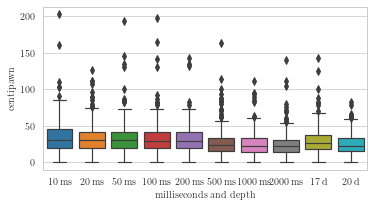

In [27]:
# Comparison between the different input parameters for the score evaluation.
plt.figure(figsize=(WIDTH, SMALL_HEIGHT))
boxplot_score = sns.boxplot(x="variable", y="value", data=pd.melt(df_score))
boxplot_score.set_xlabel("milliseconds and depth")
boxplot_score.set_ylabel("centipawn")
#sns.set_xlabel(["10ms", "20ms", "50ms", "100ms", "200ms", "500ms", "1000ms", "2000ms", "5000ms", "17 depth", "20 depth"])

In [28]:
fig = boxplot_score.get_figure()
fig.tight_layout()
fig.savefig(OUTPUT+"boxplot_score.pdf")


In [29]:
df_score.describe()


,"10\,ms","20\,ms","50\,ms","100\,ms","200\,ms","500\,ms","1000\,ms","2000\,ms","17\,d","20\,d"
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,34.003215,32.588424,31.572347,32.372990,30.906752,27.147910,25.099678,23.546624,28.919614,24.601286
std,23.366574,20.509739,22.465610,23.516688,19.588533,19.435186,17.010614,17.201564,19.152107,16.003080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,20.000000,19.000000,19.000000,19.500000,16.000000,14.000000,14.000000,18.000000,15.000000
50%,30.000000,30.000000,30.000000,29.000000,29.000000,24.000000,23.000000,22.000000,26.000000,23.000000
75%,45.500000,42.000000,41.000000,42.000000,41.000000,34.000000,33.000000,30.000000,38.000000,33.000000
max,203.000000,127.000000,193.000000,198.000000,143.000000,163.000000,111.000000,140.000000,143.000000,83.000000


In [30]:
df_timing_score = pd.read_sql("SELECT score_b0010 as '10\,ms', score_b0020 as '20\,ms', score_b0050 as '50\,ms', score_b0100 as '100\,ms', score_b0200 as '200\,ms', score_b0500 as '500\,ms', score_b1000 as '1000\,ms', score_b2000 as '2000\,ms', score_b10 as '17\,d', score_b20 as '20\,d' FROM timing_score", connection)
df_timing_score.describe()

,"10\,ms","20\,ms","50\,ms","100\,ms","200\,ms","500\,ms","1000\,ms","2000\,ms","17\,d","20\,d"
count,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000
mean,0.011878,0.021554,0.051592,0.101397,0.201734,0.501607,1.001537,2.001829,0.304484,1.143025
std,0.006769,0.007593,0.007182,0.007825,0.004497,0.004749,0.004657,0.005028,0.250406,0.901346
min,0.000000,0.015000,0.046000,0.093000,0.187000,0.500000,1.000000,2.000000,0.000000,0.000000
25%,0.015000,0.016000,0.047000,0.094000,0.203000,0.500000,1.000000,2.000000,0.110000,0.437000
50%,0.015000,0.016000,0.047000,0.094000,0.203000,0.500000,1.000000,2.000000,0.250000,0.969000
75%,0.016000,0.031000,0.062000,0.109000,0.203000,0.500000,1.000000,2.000000,0.437000,1.641000
max,0.031000,0.032000,0.063000,0.110000,0.218000,0.516000,1.016000,2.016000,1.797000,6.859000


Text(0, 0.5, 'seconds')

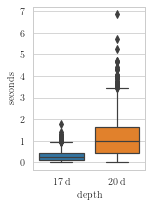

In [31]:
# Time comparison.
plt.figure(figsize=(2, SMALL_HEIGHT))
boxplot_timing = sns.boxplot(x="variable", y="value", data=pd.melt(df_timing_score[['17\,d', '20\,d']]))
boxplot_timing.set_xlabel("depth")
boxplot_timing.set_ylabel("seconds")

In [32]:
fig = boxplot_timing.get_figure()
fig.tight_layout()
fig.savefig(OUTPUT+"boxplot_timing.pdf")